In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2
import matplotlib.image as mpimg
from matplotlib import pyplot as plt
import seaborn as sns
import albumentations as A
from skimage.exposure import rescale_intensity


import numpy as np
import matplotlib.pyplot as plt

from skimage import data
from skimage.color import rgb2hed, hed2rgb

In [ ]:
def imageProcessing1(df):

        #img = cv2.imread(df)
        # Example IHC image
        ihc_rgb = df#img

        # Separate the stains from the IHC image
        ihc_hed = rgb2hed(ihc_rgb)

        # Create an RGB image for each of the stains
        null = np.zeros_like(ihc_hed[:, :, 0])
        ihc_h = hed2rgb(np.stack((ihc_hed[:, :, 0], null, null), axis=-1))

        ihc_h = ihc_h*255      

   
        image1 = ihc_h.astype('uint8')
   
        # cv2.cvtColor is applied over the
        # image input with applied parameters
        # to convert the image in grayscale 
        image_result = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)


        return image_result

In [ ]:
def imageProcessing2(df):

        #img = cv2.imread(df)
        # Example IHC image
        ihc_rgb = df#img

        # Separate the stains from the IHC image
        ihc_hed = rgb2hed(ihc_rgb)

        # Create an RGB image for each of the stains
        null = np.zeros_like(ihc_hed[:, :, 0])
        ihc_d = hed2rgb(np.stack((ihc_hed[:, :, 2], null, null), axis=-1))

        ihc_d = ihc_d*255      

   

        image1 = ihc_d.astype('uint8')
   
        # cv2.cvtColor is applied over the
        # image input with applied parameters
        # to convert the image in grayscale 
        image_result = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)


        return image_result

In [ ]:
def imageProcessing3(df):

        #img = cv2.imread(df)
        # Example IHC image
        ihc_rgb = df#img

        # Separate the stains from the IHC image
        ihc_hed = rgb2hed(ihc_rgb)

        # Create an RGB image for each of the stains
        null = np.zeros_like(ihc_hed[:, :, 0])
        # Rescale hematoxylin and DAB channels and give them a fluorescence look
        h = rescale_intensity(ihc_hed[:, :, 0], out_range=(0, 1),
                      in_range=(0, np.percentile(ihc_hed[:, :, 0], 99)))
        d = rescale_intensity(ihc_hed[:, :, 2], out_range=(0, 1),
                      in_range=(0, np.percentile(ihc_hed[:, :, 2], 99)))
        

        # Cast the two channels into an RGB image, as the blue and green channels
        # respectively
        zdh = np.dstack((null, d, h))

        zdh = zdh*255      


        image1 = zdh.astype('uint8')
   
        # cv2.cvtColor is applied over the
        # image input with applied parameters
        # to convert the image in grayscale 
        image_result = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)


        return image_result

In [ ]:
def imageProcessing4(df):

        #img = cv2.imread(df)
       
        img = df
        # Split
        red = img[:, :, 0]

        image_result = red*255


        return image_result

In [ ]:
def imageProcessing5(df):

        #img = cv2.imread(df)
        img = df

        # Split
        green = img[:, :, 1]

        image_result = green*255


        return image_result

In [ ]:
def imageProcessing6(df):

        #img = cv2.imread(df)
        img = df
        

        # Split
        blue = img[:, :, 2]

        image_result = blue*255


        return image_result

Declaration of a simple preprocessor function.  Preprocessor functions are used to preprocess an instance before labeling it. We use @preprocessor(name,resources) decorator to declare a function as preprocessor.

In [ ]:
#from spear.labeling import preprocessor

#@preprocessor(name = "noise_removal")
def imagePreProcessing(df):

        img = cv2.imread(df)
        #Noise Removing
        image = cv2.fastNlMeansDenoisingColored(img,None,10,10,7,21)
        #Gaussian Blur
        gaussian_3 = cv2.GaussianBlur(image, (9,9), 10.0) #unblur
        image = cv2.addWeighted(image, 1.5, gaussian_3, -0.5, 0, image)
        #Laplacian Filter
        #kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]]) #filter
        #image = cv2.filter2D(image, -1, kernel)
        return image

In [ ]:
pre_processed = imagePreProcessing("1.png")

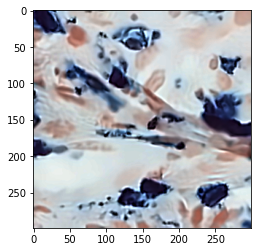

In [ ]:
plt.imshow(pre_processed)
plt.show()

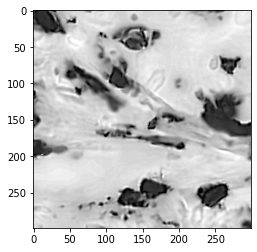

In [ ]:
processed1 = imageProcessing1(pre_processed) 
plt.imshow(processed1,cmap='gray')
plt.show()

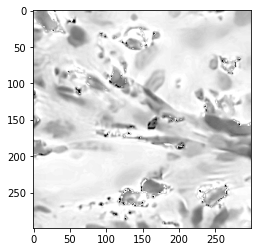

In [ ]:
processed2 = imageProcessing2(pre_processed) 
plt.imshow(processed2,cmap='gray')
plt.show()

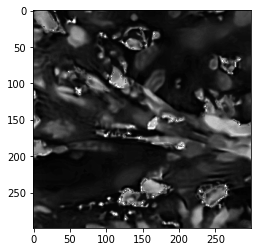

In [ ]:
processed3 = imageProcessing3(pre_processed) 
plt.imshow(processed3,cmap='gray')
plt.show()

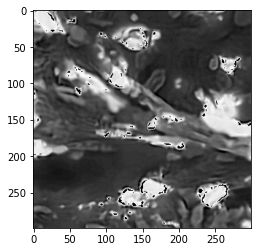

In [ ]:
processed4 = imageProcessing4(pre_processed) 
plt.imshow(processed4,cmap='gray')
plt.show()

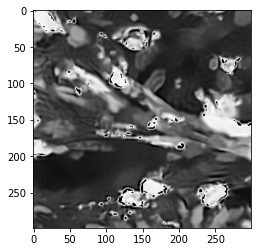

In [ ]:
processed5 = imageProcessing5(pre_processed) 
plt.imshow(processed5,cmap='gray')
plt.show()

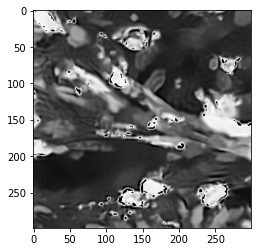

In [ ]:
processed5 = imageProcessing5(pre_processed) 
plt.imshow(processed5,cmap='gray')
plt.show()

In [ ]:
#@labeling_function(resources=dict(keywords=trigWord1),pre=[convert_to_lower],label=ClassLabels.SPAM)
def LF1(c, d): 
    
    image = d
    img = c
    # applying different thresholding 
    # techniques on the input image
    # Otsu's thresholding after Gaussian filtering
    # Apply GaussianBlur to reduce image noise if it is required

    blur = cv2.GaussianBlur(img,(5,5),0)
    otsu_threshold, image_result = cv2.threshold(
         blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU,)
    
    thresh2 = 255-image_result

    output = cv2.connectedComponentsWithStats(thresh2)
    (numLabels, labels, stats, centroids) = output
    mask = np.zeros(thresh2.shape, dtype="uint8")

    # loop over the number of unique connected component labels, skipping
    # over the first label (as label zero is the background)
    for i in range(1, numLabels):
        # extract the connected component statistics for the current label
        x = stats[i, cv2.CC_STAT_LEFT]
        y = stats[i, cv2.CC_STAT_TOP]
        w = stats[i, cv2.CC_STAT_WIDTH]
        h = stats[i, cv2.CC_STAT_HEIGHT]
        area = stats[i, cv2.CC_STAT_AREA]
    
        # ensure the width, height, and area are all neither too small
        # nor too big
        #keepWidth = w > 5 and w < 30
        #keepHeight = h > 5 and h < 30
        #keepArea = area > 10

        keepWidth = w > 20
        keepHeight = h > 20
        keepArea = 100 < area < 2000
        # ensure the connected component we are examining passes all
        # three tests
        if all((keepWidth, keepHeight, keepArea)):
            # construct a mask for the current connected component and
            # then take the bitwise OR with the mask       
            componentMask = (labels == i).astype("uint8") * 1
            mask = cv2.bitwise_or(mask, componentMask)


        # Multiple objects
        result = image.copy()
        contours = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        contours = contours[0] if len(contours) == 2 else contours[1]
        colour = (255, 0, 0)
        thickness = 1
        i = 0
        
        bounding_boxes = []
       # Iterate through the contours and find bounding boxes
        for contour in contours:
            x, y, w, h = cv2.boundingRect(contour)
            bounding_boxes.append([x, y, x+w, y+h])
            cv2.rectangle(result, (x, y), (x+w, y+h), colour, thickness)
  

    return result, bounding_boxes


In [ ]:
result, bounding_boxes1 = LF1(processed1, pre_processed)

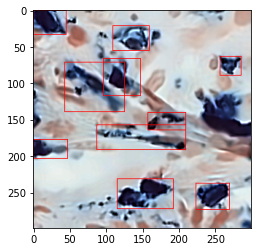

In [ ]:
plt.imshow(result)

In [ ]:
bounding_boxes1

[[223, 237, 269, 273],
 [115, 231, 192, 272],
 [0, 177, 47, 203],
 [87, 157, 209, 191],
 [157, 140, 209, 164],
 [43, 71, 125, 139],
 [96, 66, 147, 117],
 [256, 63, 285, 89],
 [109, 21, 159, 55],
 [0, 0, 45, 33]]

In [ ]:

#@labeling_function(resources=dict(keywords=trigWord1),pre=[convert_to_lower],label=ClassLabels.SPAM)
def LF2(c, d): 
    
    image = d
    img = c
    # applying different thresholding 
    # techniques on the input image
    # Otsu's thresholding after Gaussian filtering
    # Apply GaussianBlur to reduce image noise if it is required

    blur = cv2.GaussianBlur(img,(5,5),0)
    otsu_threshold, image_result = cv2.threshold(
         blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU,)
    
    thresh2 = 255-image_result

    output = cv2.connectedComponentsWithStats(thresh2)
    (numLabels, labels, stats, centroids) = output
    mask = np.zeros(thresh2.shape, dtype="uint8")

    # loop over the number of unique connected component labels, skipping
    # over the first label (as label zero is the background)
    for i in range(1, numLabels):
        # extract the connected component statistics for the current label
        x = stats[i, cv2.CC_STAT_LEFT]
        y = stats[i, cv2.CC_STAT_TOP]
        w = stats[i, cv2.CC_STAT_WIDTH]
        h = stats[i, cv2.CC_STAT_HEIGHT]
        area = stats[i, cv2.CC_STAT_AREA]
    
        # ensure the width, height, and area are all neither too small
        # nor too big
        #keepWidth = w > 5 and w < 30
        #keepHeight = h > 5 and h < 30
        #keepArea = area > 10

        keepWidth = w > 20
        keepHeight = h > 20
        keepArea = 100 < area < 2000
        # ensure the connected component we are examining passes all
        # three tests
        if all((keepWidth, keepHeight, keepArea)):
            # construct a mask for the current connected component and
            # then take the bitwise OR with the mask       
            componentMask = (labels == i).astype("uint8") * 1
            mask = cv2.bitwise_or(mask, componentMask)


        # Multiple objects
        result = image.copy()
        contours = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        contours = contours[0] if len(contours) == 2 else contours[1]
        colour = (255, 0, 0)
        thickness = 1
        i = 0
        
        bounding_boxes = []
       # Iterate through the contours and find bounding boxes
        for contour in contours:
            x, y, w, h = cv2.boundingRect(contour)
            bounding_boxes.append([x, y, x+w, y+h])
            cv2.rectangle(result, (x, y), (x+w, y+h), colour, thickness)
  

    return result, bounding_boxes


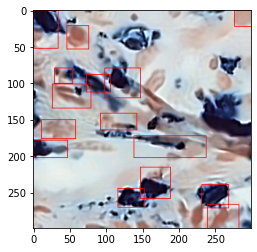

In [ ]:
result2, bounding_boxes2 = LF2(processed2, pre_processed)
plt.imshow(result2)

In [ ]:
bounding_boxes2

[[239, 266, 282, 299],
 [116, 244, 152, 270],
 [231, 239, 268, 271],
 [147, 215, 188, 258],
 [0, 178, 47, 202],
 [138, 172, 237, 202],
 [11, 150, 58, 176],
 [92, 141, 142, 164],
 [26, 101, 79, 134],
 [73, 88, 106, 112],
 [98, 79, 147, 120],
 [29, 79, 54, 100],
 [46, 21, 76, 53],
 [276, 0, 299, 22],
 [0, 0, 34, 52]]

In [ ]:
#@labeling_function(resources=dict(keywords=trigWord1),pre=[convert_to_lower],label=ClassLabels.SPAM)
def LF3(c, d): 
    
    image = d
    img = c
    # applying different thresholding 
    # techniques on the input image
    # Otsu's thresholding after Gaussian filtering
    # Apply GaussianBlur to reduce image noise if it is required

    blur = cv2.GaussianBlur(img,(5,5),0)
    otsu_threshold, image_result = cv2.threshold(
         blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU,)
    
    thresh2 = image_result

    output = cv2.connectedComponentsWithStats(thresh2)
    (numLabels, labels, stats, centroids) = output
    mask = np.zeros(thresh2.shape, dtype="uint8")

    # loop over the number of unique connected component labels, skipping
    # over the first label (as label zero is the background)
    for i in range(1, numLabels):
        # extract the connected component statistics for the current label
        x = stats[i, cv2.CC_STAT_LEFT]
        y = stats[i, cv2.CC_STAT_TOP]
        w = stats[i, cv2.CC_STAT_WIDTH]
        h = stats[i, cv2.CC_STAT_HEIGHT]
        area = stats[i, cv2.CC_STAT_AREA]
    
        # ensure the width, height, and area are all neither too small
        # nor too big
        #keepWidth = w > 5 and w < 30
        #keepHeight = h > 5 and h < 30
        #keepArea = area > 10

        keepWidth = w > 20
        keepHeight = h > 20
        keepArea = 100 < area < 2000
        # ensure the connected component we are examining passes all
        # three tests
        if all((keepWidth, keepHeight, keepArea)):
            # construct a mask for the current connected component and
            # then take the bitwise OR with the mask       
            componentMask = (labels == i).astype("uint8") * 1
            mask = cv2.bitwise_or(mask, componentMask)


        # Multiple objects
        result = image.copy()
        contours = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        contours = contours[0] if len(contours) == 2 else contours[1]
        colour = (255, 0, 0)
        thickness = 1
        i = 0
        
        bounding_boxes = []
        # Iterate through the contours and find bounding boxes
        for contour in contours:
            x, y, w, h = cv2.boundingRect(contour)
            bounding_boxes.append([x, y, x+w, y+h])
            cv2.rectangle(result, (x, y), (x+w, y+h), colour, thickness)
        
            #print("Object:", i+1, "x1:", x1, "x2:", x2, "y1:", y1, "y2:", y2)
            #i += 1    

    return result, bounding_boxes


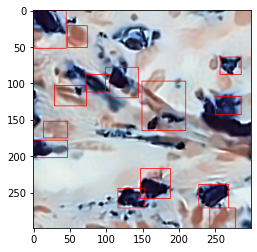

In [ ]:
result3 , bounding_boxes3 = LF3(processed3, pre_processed)
plt.imshow(result3)

In [ ]:
bounding_boxes3

[[242, 271, 277, 299],
 [116, 244, 153, 271],
 [227, 239, 268, 271],
 [147, 217, 188, 258],
 [0, 178, 47, 202],
 [14, 152, 47, 175],
 [250, 118, 285, 143],
 [29, 103, 73, 131],
 [149, 97, 209, 165],
 [72, 88, 105, 112],
 [99, 78, 144, 120],
 [256, 64, 285, 88],
 [47, 21, 74, 51],
 [0, 0, 45, 52]]

In [ ]:
#@labeling_function(resources=dict(keywords=trigWord1),pre=[convert_to_lower],label=ClassLabels.SPAM)
def LF4(c, d): 
    
    image = d
    img = c
    # applying different thresholding 
    # techniques on the input image
    # Otsu's thresholding after Gaussian filtering
    # Apply GaussianBlur to reduce image noise if it is required

    blur = cv2.GaussianBlur(img,(5,5),0)
    otsu_threshold, image_result = cv2.threshold(
         blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU,)
    
    thresh2 = image_result

    output = cv2.connectedComponentsWithStats(thresh2)
    (numLabels, labels, stats, centroids) = output
    mask = np.zeros(thresh2.shape, dtype="uint8")

    # loop over the number of unique connected component labels, skipping
    # over the first label (as label zero is the background)
    for i in range(1, numLabels):
        # extract the connected component statistics for the current label
        x = stats[i, cv2.CC_STAT_LEFT]
        y = stats[i, cv2.CC_STAT_TOP]
        w = stats[i, cv2.CC_STAT_WIDTH]
        h = stats[i, cv2.CC_STAT_HEIGHT]
        area = stats[i, cv2.CC_STAT_AREA]
    
        # ensure the width, height, and area are all neither too small
        # nor too big
        #keepWidth = w > 5 and w < 30
        #keepHeight = h > 5 and h < 30
        #keepArea = area > 10

        keepWidth = w > 20
        keepHeight = h > 20
        keepArea = 100 < area < 2000
        # ensure the connected component we are examining passes all
        # three tests
        if all((keepWidth, keepHeight, keepArea)):
            # construct a mask for the current connected component and
            # then take the bitwise OR with the mask       
            componentMask = (labels == i).astype("uint8") * 1
            mask = cv2.bitwise_or(mask, componentMask)


        # Multiple objects
        result = image.copy()
        contours = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        contours = contours[0] if len(contours) == 2 else contours[1]
        colour = (255, 0, 0)
        thickness = 1
        i = 0
        
        bounding_boxes = []
        # Iterate through the contours and find bounding boxes
        for contour in contours:
            x, y, w, h = cv2.boundingRect(contour)
            bounding_boxes.append([x, y, x+w, y+h])
            cv2.rectangle(result, (x, y), (x+w, y+h), colour, thickness)
        
            #print("Object:", i+1, "x1:", x1, "x2:", x2, "y1:", y1, "y2:", y2)
            #i += 1    

    return result, bounding_boxes


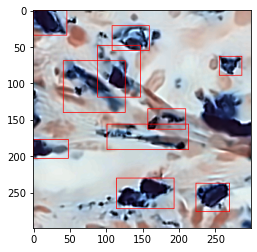

In [ ]:
result4 ,bounding_boxes4 = LF4(processed4, pre_processed)
plt.imshow(result4)

In [ ]:
bounding_boxes4

[[223, 237, 269, 276],
 [114, 230, 193, 272],
 [0, 177, 48, 203],
 [101, 156, 213, 191],
 [157, 135, 209, 163],
 [41, 69, 126, 140],
 [255, 63, 286, 89],
 [88, 48, 147, 119],
 [108, 21, 159, 55],
 [0, 0, 46, 34]]

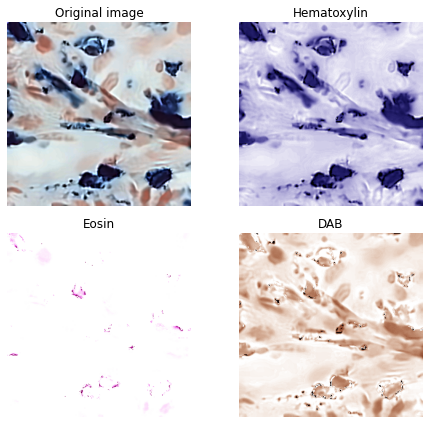

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from skimage import data
from skimage.color import rgb2hed, hed2rgb

# Example IHC image
ihc_rgb = pre_processed

# Separate the stains from the IHC image
ihc_hed = rgb2hed(ihc_rgb)

# Create an RGB image for each of the stains
null = np.zeros_like(ihc_hed[:, :, 0])
ihc_h = hed2rgb(np.stack((ihc_hed[:, :, 0], null, null), axis=-1))
ihc_e = hed2rgb(np.stack((null, ihc_hed[:, :, 1], null), axis=-1))
ihc_d = hed2rgb(np.stack((null, null, ihc_hed[:, :, 2]), axis=-1))

# Display
fig, axes = plt.subplots(2, 2, figsize=(7, 6), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(ihc_rgb)
ax[0].set_title("Original image")

ax[1].imshow(ihc_h)
ax[1].set_title("Hematoxylin")

ax[2].imshow(ihc_e)
ax[2].set_title("Eosin")  # Note that there is no Eosin stain in this image

ax[3].imshow(ihc_d)
ax[3].set_title("DAB")

for a in ax.ravel():
    a.axis('off')

fig.tight_layout()